Analysis of the results of in-sample game and contexts.

Results for this experiment are in /results directory.
The model names are 7b_org, 7b_finetuned, and 70b_reasoning. The 70b is an extra test (without reasoning) and is not included in the paper results.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import re
import os

from PIL import Image


# Sample data dictionary (replace this with your actual data)

llm = '7bF'

data = pickle.load(open(os.path.join("../ood_game/", llm+"-results-ood.txt"), "rb" ))

# data type
print(type(data))

# data info
print(data.keys())

<class 'dict'>
dict_keys(['team_prison_d', 'team_delight_d', 'team_staghunt_d', 'team_snowdrift_d', 'IR_prison_d', 'IR_delight_d', 'IR_staghunt_d', 'IR_snowdrift_d', 'friendsharing_prison_d', 'friendsharing_delight_d', 'friendsharing_staghunt_d', 'friendsharing_snowdrift_d', 'biz_prison_d', 'biz_delight_d', 'biz_staghunt_d', 'biz_snowdrift_d', 'environment_prison_d', 'environment_delight_d', 'environment_staghunt_d', 'environment_snowdrift_d'])


In [14]:
print(len(data['IR_prison']))

KeyError: 'IR_prison'

In [15]:
# check for invalid values
for key in data.keys():
    for item in data[key]:
        if item != '  C' and item != '  D':
            print(key, item)

In [16]:
# create a function to show the distribution of the data
# return a dictionary, with keys as the keys of the input dictionary, and values as the distribution of the data
def show_distribution(data):
    distribution = {}
    for key in data.keys():
        distribution[key] = {}
        for item in data[key]:
            if item not in distribution[key]:
                distribution[key][item] = 1
            else:
                distribution[key][item] += 1
    return distribution

# show the distribution of the data
distribution = show_distribution(data)
print(distribution)
# save the distribution to a .txt file
# with open(os.path.join("../oos-context/", llm+"_distribution.txt"), "x") as f:
#     for key in distribution.keys():
#         # write each line like this: key: {item1: count1, item2: count2}
#         f.write(key + ': ' + str(distribution[key]) + '\n')

# print('Distribution saved to ' + llm + '_distribution.txt')

{'team_prison_d': {'  C': 426, '  D': 174}, 'team_delight_d': {'  D': 146, '  C': 454}, 'team_staghunt_d': {'  C': 424, '  D': 176}, 'team_snowdrift_d': {'  D': 168, '  C': 432}, 'IR_prison_d': {'  C': 426, '  D': 174}, 'IR_delight_d': {'  C': 420, '  D': 180}, 'IR_staghunt_d': {'  D': 188, '  C': 412}, 'IR_snowdrift_d': {'  C': 442, '  D': 158}, 'friendsharing_prison_d': {'  C': 420, '  D': 180}, 'friendsharing_delight_d': {'  C': 442, '  D': 158}, 'friendsharing_staghunt_d': {'  D': 138, '  C': 462}, 'friendsharing_snowdrift_d': {'  D': 142, '  C': 458}, 'biz_prison_d': {'  C': 420, '  D': 180}, 'biz_delight_d': {'  C': 458, '  D': 142}, 'biz_staghunt_d': {'  D': 220, '  C': 380}, 'biz_snowdrift_d': {'  C': 454, '  D': 146}, 'environment_prison_d': {'  C': 396, '  D': 204}, 'environment_delight_d': {'  C': 432, '  D': 168}, 'environment_staghunt_d': {'  C': 382, '  D': 218}, 'environment_snowdrift_d': {'  C': 400, '  D': 200}}


In [17]:
# read dictionary from .txt file
def read_distribution(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    distribution = {}
    for line in lines:
        # each line is like this: key: {item1: count1, item2: count2}
        # first, split by the first ': ' to get the key
        # then, split by the '{' and '}' to get the value
        key, value = line.split(': {')
        value = value[0:-2].split(', ')
        value = {item.split(': ')[0][1:-1]: int(item.split(': ')[1]) for item in value}
        distribution[key] = value
    return distribution

# show the distribution
# print(distribution)

all_data = {}
llms = ['7b', '7bF', '70b']
for llm in llms:
    distribution = read_distribution(os.path.join("../ood_game", llm+"_distribution.txt"))
    
    all_data[llm] = distribution
    
# # save the all_data dictionary to a .txt file
# with open(os.path.join("../oos_context", "all_data_reasoning.txt"), "w") as f:
#     f.write(str(all_data))
    
# print('All data saved to all_data.txt')

# # save to a .pkl file
# pickle.dump(all_data, open(os.path.join("../oos_context", "all_data_reasoning.pkl"), "wb"))

# print('All data saved to all_data.pkl')

['team_prison_d', 'team_delight_d', 'team_staghunt_d', 'team_snowdrift_d', 'IR_prison_d', 'IR_delight_d', 'IR_staghunt_d', 'IR_snowdrift_d', 'friendsharing_prison_d', 'friendsharing_delight_d', 'friendsharing_staghunt_d', 'friendsharing_snowdrift_d', 'biz_prison_d', 'biz_delight_d', 'biz_staghunt_d', 'biz_snowdrift_d', 'environment_prison_d', 'environment_delight_d', 'environment_staghunt_d', 'environment_snowdrift_d']


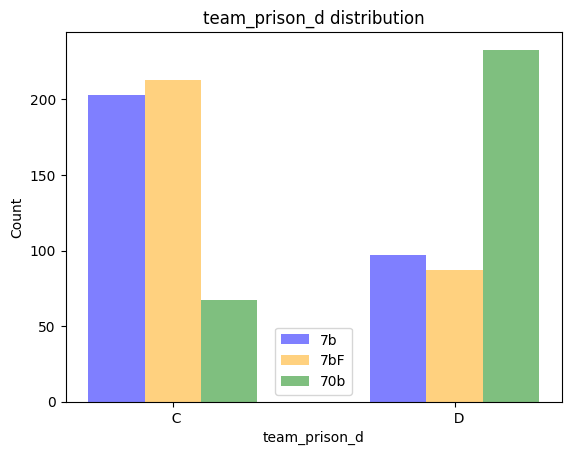

team_prison_d


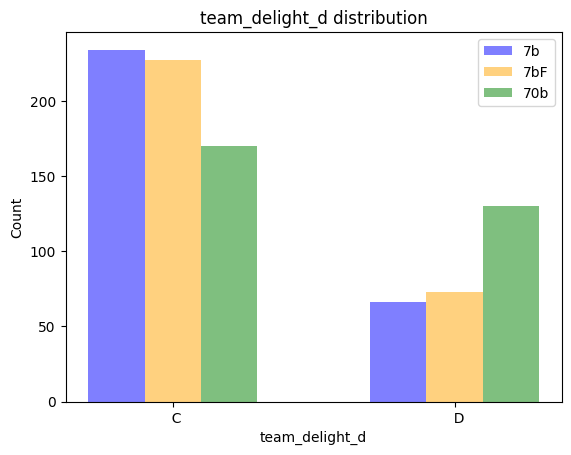

team_delight_d


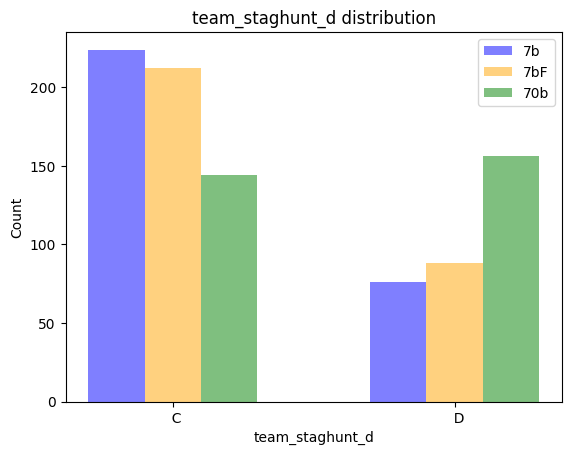

team_staghunt_d


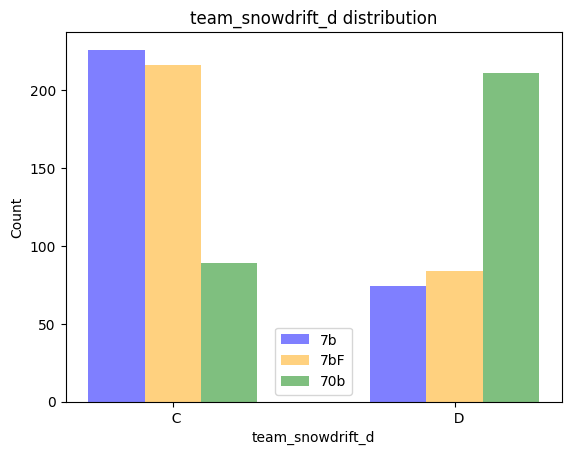

team_snowdrift_d


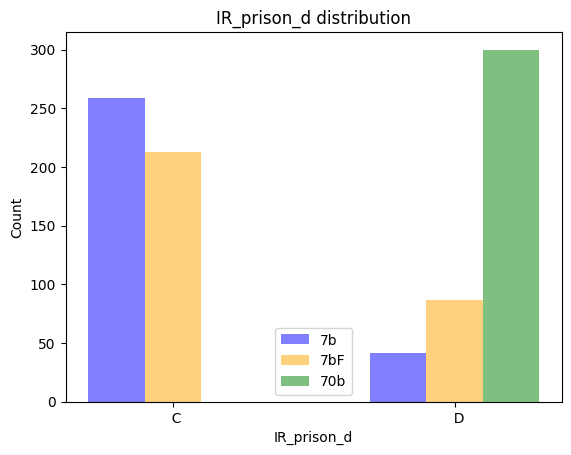

IR_prison_d


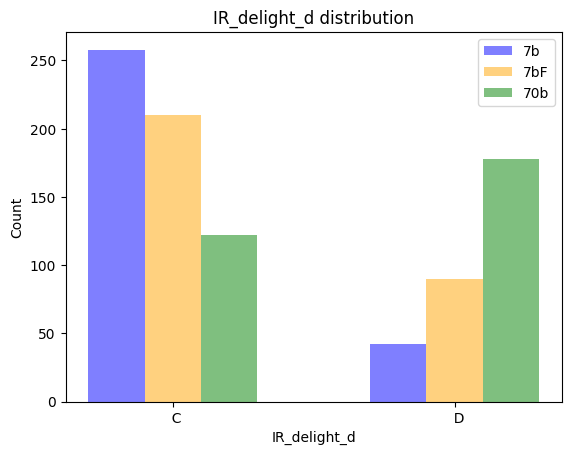

IR_delight_d


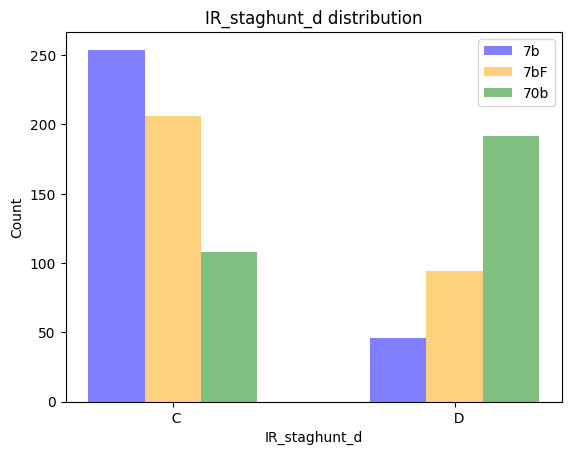

IR_staghunt_d


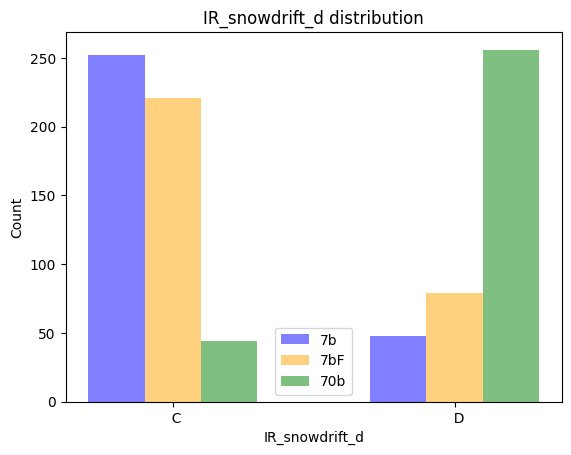

IR_snowdrift_d


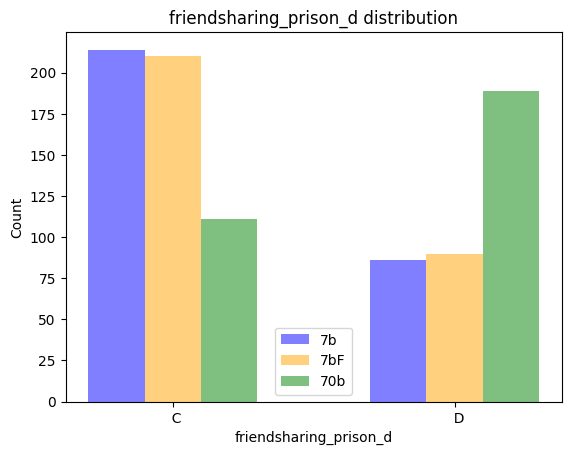

friendsharing_prison_d


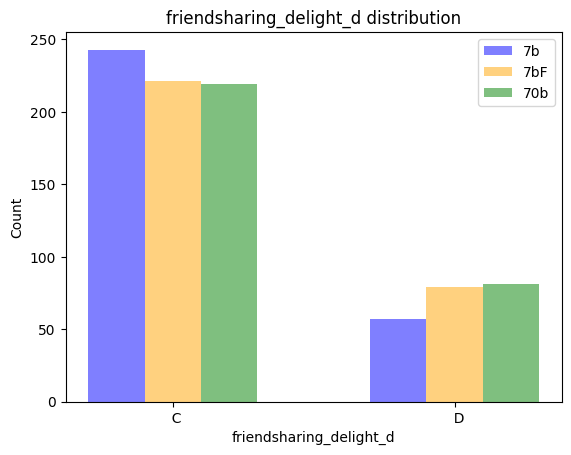

friendsharing_delight_d


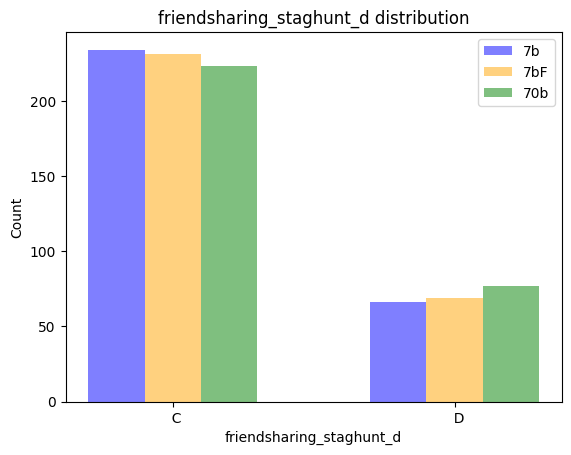

friendsharing_staghunt_d


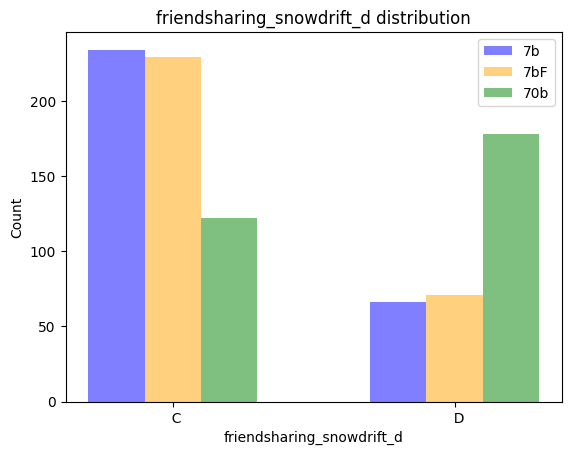

friendsharing_snowdrift_d


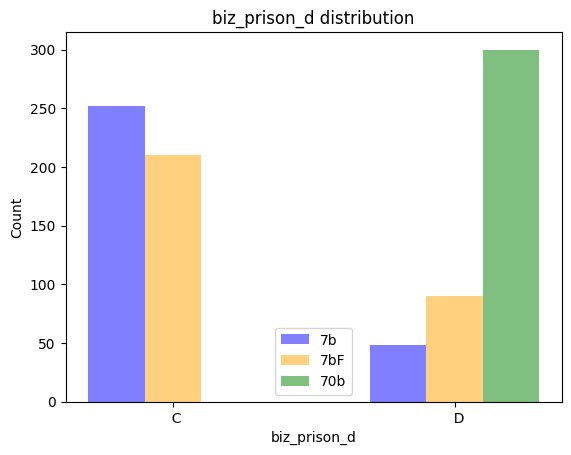

biz_prison_d


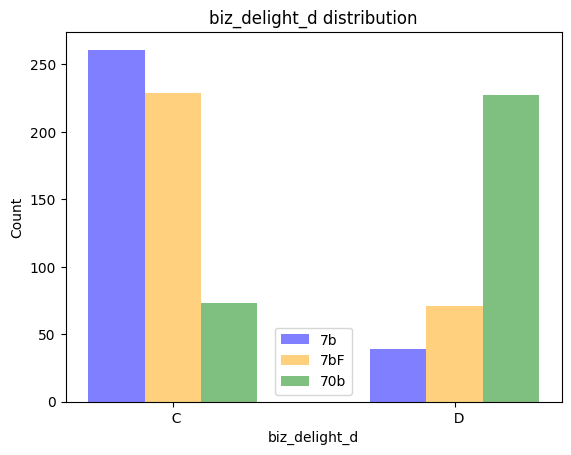

biz_delight_d


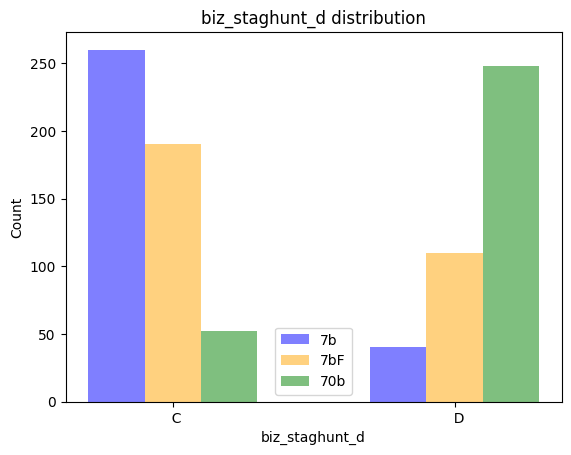

biz_staghunt_d


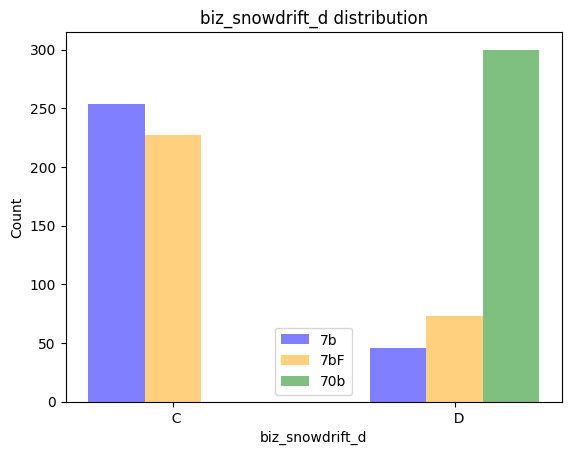

biz_snowdrift_d


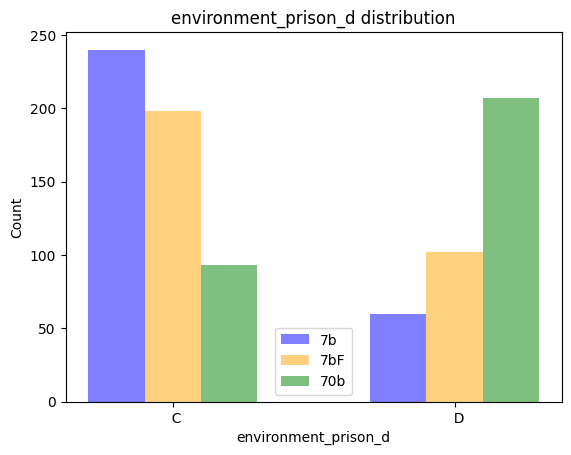

environment_prison_d


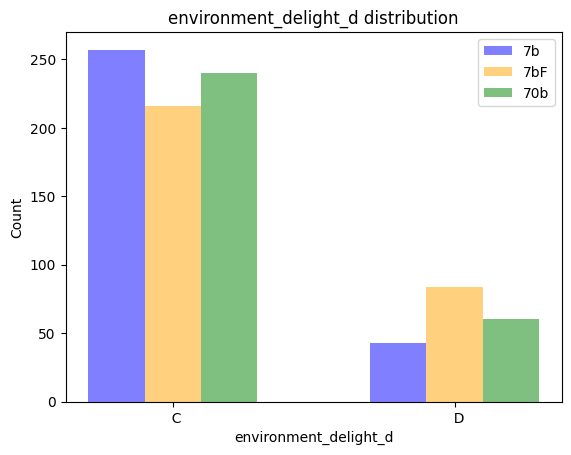

environment_delight_d


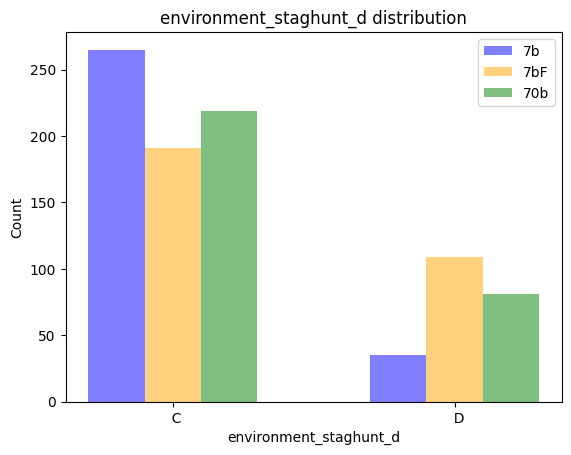

environment_staghunt_d


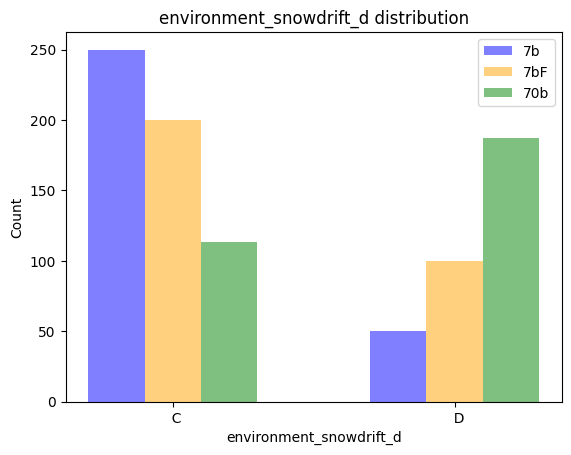

environment_snowdrift_d


In [18]:
def compare_distribution_for_each_game(all_data, game):
    plt.figure()
    bar_width = 0.2  # Width of each bar
    bar_positions = []  # List to store the x positions of bars

    for index, llm in enumerate(all_data.keys()):
        valid_keys = all_data[llm][game].keys()
        # Generate x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_keys))]
        bar_positions.append(x)
        # color = 'b' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'red'
        color = 'blue' if llm == '7b' else 'orange' if llm == '7bF' else 'green'
        plt.bar(x, all_data[llm][game].values(), width=bar_width, alpha=0.5, label=llm, color=color)

    # Adjust xticks to the middle of the grouped bars
    plt.xticks([pos + bar_width * (len(all_data) - 1) / 2 for pos in range(len(valid_keys))], valid_keys)

    plt.xlabel(game)
    plt.ylabel('Count')
    plt.title(game + ' distribution')
    plt.legend()
    plt.show()

# compare the distribution of different models
def compare_distribution(all_data, keys):
    for key in keys:
        compare_distribution_for_each_game(all_data, key)
        print(key)

# compare the distribution of different models
keys = [item for item in data.keys()]
print(keys)
compare_distribution(all_data, keys)

In [23]:
from collections import defaultdict

categorized_keys = defaultdict(list)
for item in keys:
    prefix = item.split('_')[0]  # Get the prefix before the underscore
    categorized_keys[prefix].append(item)
# 0 is for context, 1 is for game

# Extract values from the dictionary to get the list of lists
categorized_keys

defaultdict(list,
            {'team': ['team_prison_d',
              'team_delight_d',
              'team_staghunt_d',
              'team_snowdrift_d'],
             'IR': ['IR_prison_d',
              'IR_delight_d',
              'IR_staghunt_d',
              'IR_snowdrift_d'],
             'friendsharing': ['friendsharing_prison_d',
              'friendsharing_delight_d',
              'friendsharing_staghunt_d',
              'friendsharing_snowdrift_d'],
             'biz': ['biz_prison_d',
              'biz_delight_d',
              'biz_staghunt_d',
              'biz_snowdrift_d'],
             'environment': ['environment_prison_d',
              'environment_delight_d',
              'environment_staghunt_d',
              'environment_snowdrift_d']})

In [25]:
def aggregated_comparison_by_category(all_data, category, category_type):
    llms = all_data.keys()
    plt.figure(figsize=(10, 5))
    bar_width = 0.2
    llm_colors = {'7b': 'blue', '7bF': 'orange', '70b': 'green'}  # Add colors for other LLMs as needed
    legend_handles = []
    
    for index, llm in enumerate(llms):
        distribution = all_data[llm]

        # filter games in distribution that have the context in the name
        valid_games = [game for game in distribution.keys() if category in game]
        
        # set the x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_games))]
        
        for i, game in enumerate(valid_games):
            # only show the value for key: '  C'
            color = llm_colors[llm]
            y = distribution[game]['  C'] / (sum(distribution[game].values()) + 1e-10) * 100  # Normalize the value
            print(llm, game, distribution[game]['  C'], x[i])
            plt.bar(x[i], y, width=bar_width, alpha=0.5, label=game, color=color)
            # plt.bar(x[i], distribution[game]['  C'], yerr=np.std([distribution[game]['  C']]), width=bar_width, color=color, alpha=0.5)

            
        # Add legend entry for current LLM
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.5, edgecolor='none'))
    
    # edited valid games should remove its context part if the category is 'Context'
    # edited valid games should remove its game part if the category is 'Game'
    if category_type == 'Game':
        edited_valid_games = [re.sub(r'_.*', '', game) for game in valid_games]
    else:
        edited_valid_games = [re.sub(r'.*_', '', game) for game in valid_games]
    print(valid_games)
    print(edited_valid_games)
    valid_games = edited_valid_games
    
    plt.xticks([pos + bar_width * (len(valid_games) - 1) / 3 for pos in range(len(valid_games))], valid_games, fontsize=15)
    # set the xticks size to be larger
    
    plt.title(f'{category_type} {category} Distribution', fontdict={'fontsize': 16})
    plt.xlabel(category, fontsize=15)
    plt.ylabel('Cooperation Rate (%)', fontsize=15)
    plt.title(f'{category_type} {category} distribution', fontdict={'fontsize': 16})
    plt.legend(legend_handles, llms, loc='lower right', title='LLM')
    # plt.show()
    # save plot
    if category_type == 'Context':
        plt.savefig(os.path.join("../ood_game_figs/context", category + '_distribution.png'))
    else:
        plt.savefig(os.path.join("../ood_game_figs/game", category + '_distribution.png'))
    plt.close()

for category in categorized_keys:
    aggregated_comparison_by_category(all_data, category, category_type='Context')



7b team_prison_d 203 0.0
7b team_delight_d 234 1.0
7b team_staghunt_d 224 2.0
7b team_snowdrift_d 226 3.0
7bF team_prison_d 213 0.2
7bF team_delight_d 227 1.2
7bF team_staghunt_d 212 2.2
7bF team_snowdrift_d 216 3.2
70b team_prison_d 67 0.4
70b team_delight_d 170 1.4
70b team_staghunt_d 144 2.4
70b team_snowdrift_d 89 3.4
['team_prison_d', 'team_delight_d', 'team_staghunt_d', 'team_snowdrift_d']
['d', 'd', 'd', 'd']
7b IR_prison_d 259 0.0
7b IR_delight_d 258 1.0
7b IR_staghunt_d 254 2.0
7b IR_snowdrift_d 252 3.0
7bF IR_prison_d 213 0.2
7bF IR_delight_d 210 1.2
7bF IR_staghunt_d 206 2.2
7bF IR_snowdrift_d 221 3.2
70b IR_prison_d 0 0.4
70b IR_delight_d 122 1.4
70b IR_staghunt_d 108 2.4
70b IR_snowdrift_d 44 3.4
['IR_prison_d', 'IR_delight_d', 'IR_staghunt_d', 'IR_snowdrift_d']
['d', 'd', 'd', 'd']
7b friendsharing_prison_d 214 0.0
7b friendsharing_delight_d 243 1.0
7b friendsharing_staghunt_d 234 2.0
7b friendsharing_snowdrift_d 234 3.0
7bF friendsharing_prison_d 210 0.2
7bF friendsharin

this is for in-sample context that are 5:

In [15]:
def merge_images(folder_path, output_path):
    # merge three .png files into one .png file, using the following layout:
    # 1 2
    #  3
    # 4 5
    # if folder_path does not exist, create it
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    # if output_path does not exist, create it
    if not os.path.exists(os.path.dirname(output_path)):
        os.makedirs(os.path.dirname(output_path))

    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 3 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (width // 2, height))
    new_image.paste(images[3], (0, 2 * height))
    new_image.paste(images[4], (width, 2 * height))
    
    # make the empty space in the left and right of the middle image white
    for j in range(height):
        for i in range(width//2):
            new_image.putpixel((i, height + j), (255, 255, 255))
        for i in range(width*3//2, 2*width):
            new_image.putpixel((i, height + j), (255, 255, 255))
       
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)

merge_images(os.path.join("../ood_game_figs/context"), os.path.join("../2025/test_game_figs", "context_distribution.png"))

Images merged and saved to ../2025/train_figs/context_distribution.png


This is for by-game vis:

In [10]:
def merge_images_of_four(folder_path, output_path):
    # merge four .png files into one .png file, using the following layout:
    # 1 2
    # 3 4
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    # if output_path does not exist, create it
    if not os.path.exists(os.path.dirname(output_path)):
        os.makedirs(os.path.dirname(output_path))
    
    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 2 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (0, height))
    new_image.paste(images[3], (width, height))
    
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)
    
merge_images_of_four(os.path.join("../new_figs/game"), os.path.join("../2025/train_figs", "game_distribution.png"))

Images merged and saved to ../2025/train_figs/game_distribution.png


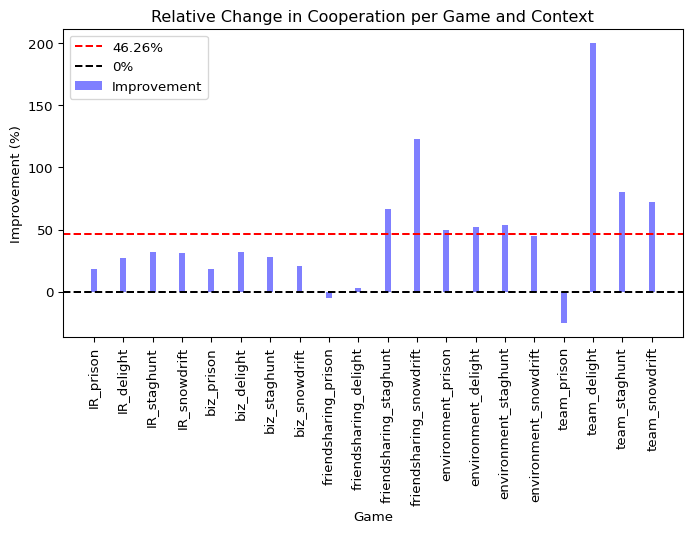

In [40]:
# for each game and context, the goal of finetuning was to reach the results of the 70b model
# so the initial model is 7b_org, the finetuned model is 7b_finetuned, and the target model is 70b
# given this, compare the progress of 7b_org and 7b_finetuned towards 70b by this formula:
# progress = (7b_finetuned - 7b_org) / (70b - 7b_org) * 100

def compare_progress(all_data, keys):
    my_dpi = 96
    plt.figure(figsize=(800/my_dpi, 400/my_dpi), dpi=my_dpi)

    # plt.figure(figsize=(10, 5))
    bar_width = 0.2
    bar_positions = []

    progress = [(all_data['7b_finetuned'][key]['  C'] - all_data['7b_org'][key]['  C']) / (all_data['70b_reasoning'][key]['  C'] - all_data['7b_org'][key]['  C']) * 100 for key in keys]
    x = [pos for pos in range(len(keys))]        
    plt.bar(x, progress, width=bar_width, alpha=0.5, label='Improvement', color='blue')
    # draw a line at y=100
    # draw a line at y=average of progress
    avg_progress = sum(progress) / len(progress)
    plt.axhline(y=avg_progress, color='red', linestyle='--', label=f'{round(avg_progress, 2)}%')
    # plot logaritmic scale
    # plt.yscale('log')
    plt.axhline(y=0, color='black', linestyle='--', label='0%')
    plt.xticks([pos for pos in range(len(keys))], keys, rotation=90)
    # make the 
    plt.xlabel('Game')
    plt.ylabel('Improvement (%)')
    plt.title('Relative Change in Cooperation per Game and Context')
    plt.legend(loc='upper left')
    # plt.savefig(os.path.join("../oos_context_figs", "improvement.png"), dpi=my_dpi)
    plt.show()
    
    
compare_progress(all_data, keys)

In [75]:
# visualize the progress of 7b_org and 7b_finetuned towards 70b in a table

def compare_progress_table(all_data, keys):
    progress = [(all_data['7bF'][key]['  C'] - all_data['7b'][key]['  C']) / (all_data['70b'][key]['  C'] - all_data['7b'][key]['  C']) * 100 for key in keys]
    new_keys = keys.copy()
    
    # create a table
    table = {}
    table['Game'] = new_keys
    table['Improvement (%)'] = progress
    return table

table = compare_progress_table(all_data, keys)
print(table)

# visualize the table
import pandas as pd

df = pd.DataFrame(table)
df.to_csv(os.path.join("../new_figs", "improvement_table.csv"), index=False)
print('Table saved to improvement_table.csv')

# print the mean and standard deviation of the progress
print('Mean:', df['Improvement (%)'].mean())
print('Median:', df['Improvement (%)'].median())
print('Standard deviation:', df['Improvement (%)'].std())
print('Varience:', df['Improvement (%)'].var())
print('Max:', df['Improvement (%)'].max())
print('Min:', df['Improvement (%)'].min())

{'Game': ['IR_prison', 'IR_delight', 'IR_staghunt', 'IR_snowdrift', 'biz_prison', 'biz_delight', 'biz_staghunt', 'biz_snowdrift', 'friendsharing_prison', 'friendsharing_delight', 'friendsharing_staghunt', 'friendsharing_snowdrift', 'environment_prison', 'environment_delight', 'environment_staghunt', 'environment_snowdrift', 'team_prison', 'team_delight', 'team_staghunt', 'team_snowdrift'], 'Improvement (%)': [18.64406779661017, 27.439024390243905, 32.3943661971831, 31.372549019607842, 18.354430379746837, 32.25806451612903, 28.289473684210524, 20.666666666666668, -5.0, 3.4482758620689653, 66.66666666666666, 123.07692307692308, 50.0, 51.886792452830186, 53.65853658536586, 45.038167938931295, -25.0, 200.0, 80.0, 72.0]}
Table saved to improvement_table.csv
Mean: 46.259700261659205
Median: 32.326215356656064
Standard deviation: 48.600404709127695
Varience: 2361.9993378910012
Max: 200.0
Min: -25.0


In [168]:
# get the average progress per each game, and then per each context
def get_average_progress(all_data, keys, category_type='Game'):
    # categorize by first part of the key
    categorized_keys = defaultdict(list)
    for item in keys:
        if category_type == 'Context':
            prefix = re.sub(r'_.*', '', item)
        else:
            prefix = re.sub(r'.*_', '', item)
        categorized_keys[prefix].append(item)
    
    # get the average progress for each category
    average_progress = {}
    std_progress = {}
    for category in categorized_keys:
        progress = [(all_data['7bF'][key]['  C'] - all_data['7b'][key]['  C']) / (all_data['70b'][key]['  C'] - all_data['7b'][key]['  C']) * 100 for key in categorized_keys[category]]
        average_progress[category] = round(sum(progress) / len(progress), 2)
        std_progress[category] = round(np.std(progress), 2) / np.sqrt(len(progress))  # standard error
        print(f'Category: {category}, Average Progress: {average_progress[category]}%, Standard Error: {std_progress[category]}%')

        if category == 'friendsharing':
            print(progress)
    return average_progress, std_progress

def visualize_average_progress(average_progress, std_progress, category_type='Game'):
    plt.figure()
    x = [pos for pos in range(len(average_progress))]
    # color the bars based on names:
    # for sports, color it #442B48
    # for roomsharing, color it #98B06F
    # for venture, color it #DBFF76
    for i, category in enumerate(average_progress.keys()):
        color = '#704B7C' if category == 'sports' else '#98B06F' if category == 'roomsharing' else '#DBFF76'
        color_dict = {'delight': '#6393A6', 'prison':'#A66D6D', 'snowdrift':'#BF9E39', 'staghunt':'#6C8C77', 
                      'biz':'#296478', 'team':'#D99C5D', 'IR':'#94579E',
                      'friendsharing':"#00A3D9", 'environment':"#9FD95D"}
        if category in color_dict.keys():
            color = color_dict[category]
        plt.bar(i, average_progress[category], yerr=std_progress[category], alpha=0.5, label=category, color=color)
    
    # remove extra space between bars
    # write the y value on top of each bar
    
    for i, v in enumerate(average_progress.values()):
        plt.text(i, v-5, f'{str(v)}%', ha='center', fontsize=12)
    
    plt.xticks(x, average_progress.keys(), fontsize=10)
    # set the bar width to be smaller
    
    plt.xlabel(category_type)
    plt.ylabel('Improvement (%)')
    # plt.title(f'Average Improvement in Cooperation Count per {category_type}')

    # draw a line at y=average of progress
    # avg_progress = sum(average_progress.values()) / len(average_progress)
    # plt.axhline(y=avg_progress, color='red', linestyle='--', label='average')
    plt.legend(loc='upper left')

    plt.savefig(os.path.join("../new_figs", f"average_progress_{category_type}.png"))
    plt.show()
    


category_type = 'Context'
average_progress, std_progress = get_average_progress(all_data, keys, category_type)
visualize_average_progress(average_progress, std_progress, category_type)

KeyError: 'IR_prison'

In [149]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import entropy
from matplotlib.colors import LinearSegmentedColormap, PowerNorm

# -----------------------------------
# 0. Assumes you already have:
#    all_data = {
#       '7b':   { key1: {'  C':…, '  D':…}, … },
#       '7bF':  { key1: {'  C':…, '  D':…}, … },
#       '70b':  { key1: {'  C':…, '  D':…}, … }
#    }
# -----------------------------------

# 1) Build a flat DataFrame of p(C) for each model, game, context
keys = list(all_data['7b'].keys())
rows = []
for key in keys:
    ctx, game = key.split('_', 1)
    C7b   = all_data['7b'][key]['  C']
    C7bF  = all_data['7bF'][key]['  C']
    C70b  = all_data['70b'][key]['  C']
    # get total rounds N:
    if '  D' in all_data['7b'][key]:
        N = C7b + all_data['7b'][key]['  D']
    else:
        # fallback: assume cooperation + defection from the largest model
        D70b = all_data['70b'][key].get('  D', 0)
        N   = C70b + D70b
    p7b   = C7b  / N
    p7bF  = C7bF / N
    p70b  = C70b / N
    rows.append((key, ctx, game, p7b, p7bF, p70b))
df = pd.DataFrame(rows, columns=['key','context','game','p7b','p7bF','p70b'])

# 2) Compute three metrics per scenario:
#    - Bridging score   = % of the original gap closed
#    - Cosine similarity between [p,1-p]
#    - Jensen-Shannon divergence
df['orig_gap'] = np.abs(df['p7b']  - df['p70b'])
df['ft_gap']   = np.abs(df['p7bF'] - df['p70b'])
df['bridging'] = (df['orig_gap'] - df['ft_gap']) / df['orig_gap']
df['improvement'] = (df['p7bF'] - df['p7b']) / (df['p70b'] - df['p7b'])

df['cosine'] = df.apply(
    lambda r: 1 - cosine([r['p7bF'], 1-r['p7bF']], [r['p70b'], 1-r['p70b']]),
    axis=1
)

def js_div(p, q):
    M = 0.5*(np.array(p) + np.array(q))
    return 0.5*entropy(p, M) + 0.5*entropy(q, M)

df['js_div'] = df.apply(
    lambda r: js_div([r['p7bF'],1-r['p7bF']], [r['p70b'],1-r['p70b']]),
    axis=1
)

# 3) Aggregate per game (mean ± SEM)
game_m = df.groupby('game').agg(
    bridging_mean=('bridging','mean'), bridging_se=('bridging','sem'),
    cosine_mean=('cosine','mean'),   cosine_se=('cosine','sem'),
    js_mean=('js_div','mean'),       js_se=('js_div','sem')
).reset_index()


# — Plot 3. Heatmap of Bridging (Game × Context) —
pivot = df.pivot_table(index='context', columns='game', values='improvement', aggfunc='mean')


<Figure size 800x600 with 0 Axes>

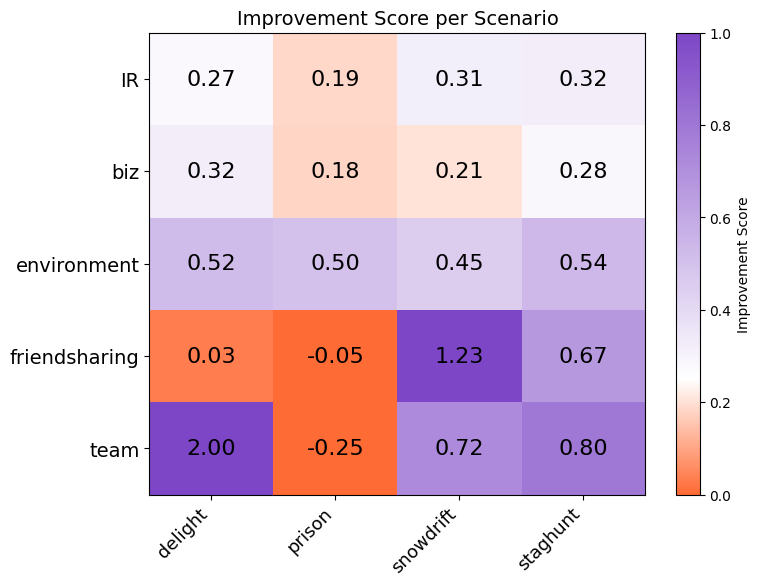

In [164]:
plt.figure(figsize=(8,6))

mid_blue = (0.4, 0.25, 0.5) 

cmap3 = LinearSegmentedColormap.from_list(
    'orange_blue_mid', 
    [
        (0.00, '#FF6B35'),
        (0.25, '#FFFFFF'),
        (1.00, '#7D46C6')
    ]
)

colors = ['#303633', '#35D65D']
cmap = LinearSegmentedColormap.from_list('gray_blue', colors)

plt.imshow(pivot, cmap=cmap3, vmin=0, vmax=1, aspect='auto')
for (i, j), val in np.ndenumerate(pivot):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=16)

plt.colorbar(label='Improvement Score')
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha='right', fontsize=13)
plt.yticks(range(len(pivot.index)), pivot.index, fontsize=14)
plt.title('Improvement Score per Scenario', fontsize=14)
plt.savefig(os.path.join("../new_figs", "improvement_heatmap_train.png"), bbox_inches='tight', dpi=600)
plt.show()

/var/folders/nw/_gc7dkbx2gx_j7xr0bxs1x4h0000gn/T/ipykernel_54732/581577315.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub['context'], rotation=45, ha='right')
/var/folders/nw/_gc7dkbx2gx_j7xr0bxs1x4h0000gn/T/ipykernel_54732/581577315.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub['context'], rotation=45, ha='right')
/var/folders/nw/_gc7dkbx2gx_j7xr0bxs1x4h0000gn/T/ipykernel_54732/581577315.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub['context'], rotation=45, ha='right')
/var/folders/nw/_gc7dkbx2gx_j7xr0bxs1x4h0000gn/T/ipykernel_54732/581577315.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

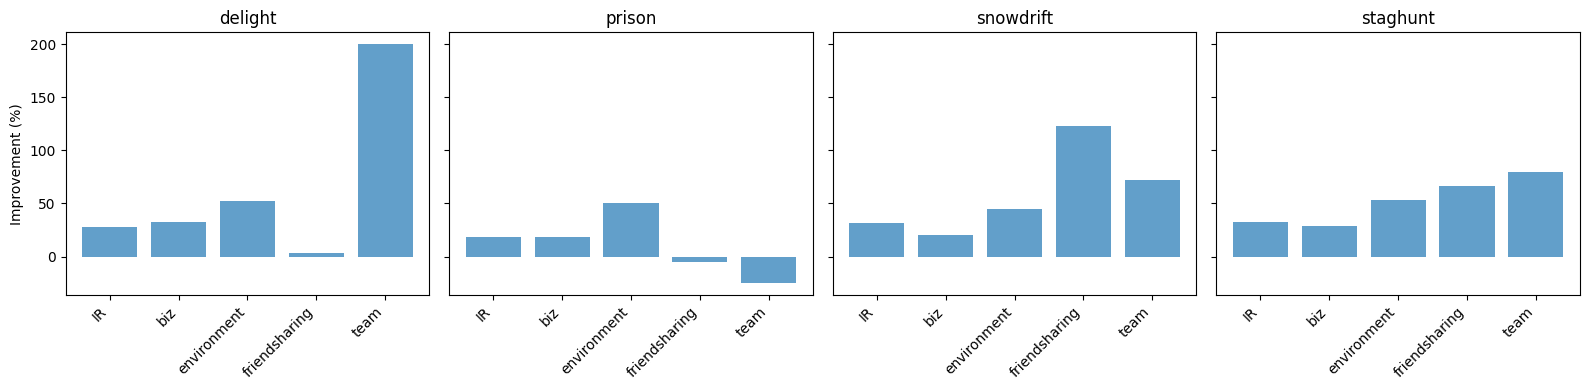

In [18]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Flatten into (game, context, improvement) rows ---
records = []
for key in all_data['7b'].keys():
    ctx, game = key.split('_', 1)
    C7b   = all_data['7b'][key]['  C']
    C7bF  = all_data['7bF'][key]['  C']
    C70b  = all_data['70b'][key]['  C']
    # improvement toward 70b (0–100)
    imp = (C7bF - C7b) / (C70b - C7b) * 100
    records.append((game, ctx, imp))

df_imp = pd.DataFrame(records, columns=['game','context','improvement'])

# --- 2) Aggregate mean & SEM for each (game, context) ---
agg = (
    df_imp
    .groupby(['game','context'])['improvement']
    .agg(mean='mean', sem='sem')
    .reset_index()
)

# --- 3) Plot: one subplot per game, bars = contexts ---
games = agg['game'].unique()
n_games = len(games)
fig, axes = plt.subplots(1, n_games, figsize=(4*n_games, 4), sharey=True)

for ax, g in zip(axes, games):
    sub = agg[agg['game']==g]
    ax.bar(sub['context'], sub['mean'], yerr=sub['sem'], alpha=0.7)
    ax.set_title(g)
    ax.set_xticklabels(sub['context'], rotation=45, ha='right')
    if ax is axes[0]:
        ax.set_ylabel('Improvement (%)')

plt.tight_layout()
plt.show()
